# COMP3314 Assignment 2 - Linear Perceptron & Stochastic Gradient Descent

### Wang Yuli 3035028946

# PART ONE : Decision Boundary for Linear Perceptron

### Code Segment 1: perceptron and dataset

In [4]:
import numpy as np


class Perceptron(object):
    """Perceptron classifier.

    Parameters
    ------------
    eta : float
        Learning rate (between 0.0 and 1.0)
    n_iter : int
        Passes over the training dataset.

    Attributes
    -----------
    w_ : 1d-array
        Weights after fitting.
    errors_ : list
        Number of misclassifications in every epoch.

    """
    def __init__(self, eta=0.01, n_iter=10):
        self.eta = eta
        self.n_iter = n_iter

    def fit(self, X, y):
        """Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_samples, n_features]
            Training vectors, where n_samples is the number of samples and
            n_features is the number of features.
        y : array-like, shape = [n_samples]
            Target values.

        Returns
        -------
        self : object

        """
        self.w_ = np.zeros(1 + X.shape[1])
        self.errors_ = []

        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.net_input(X) >= 0.0, 1, -1)

In [5]:
import pandas as pd

#data_src = '../datasets/iris/iris.data'
data_src = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'

df = pd.read_csv(data_src, header=None)

df.tail()

,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


### Code Segment 2: training and plotting region function

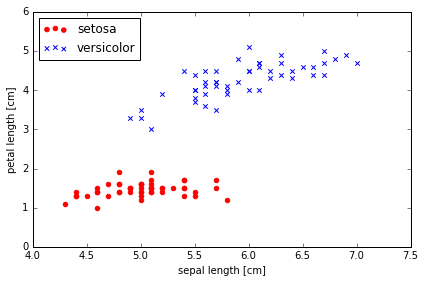

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# select setosa and versicolor
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)

# extract sepal length and petal length
X = df.iloc[0:100, [0, 2]].values

# plot data
plt.scatter(X[:50, 0], X[:50, 1],
            color='red', marker='o', label='setosa')
plt.scatter(X[50:100, 0], X[50:100, 1],
            color='blue', marker='x', label='versicolor')

plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

In [7]:
ppn = Perceptron(eta=0.1, n_iter=10)

ppn = ppn.fit(X, y)

In [8]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.01):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=cmap(idx),
                    marker=markers[idx], label=cl)

## Q1 (50pts):  Decision Boundary
To plot an accurate <font color = 'blue'>decision boundary</font>, by analytic computation.
The function is shown in the below code block

In [9]:
def plot_decision_boundary(X, y, classifier):    
    
    # horizontal axis values (x1)
    h1 = X[:, 0].min() - 1
    h2 = X[:, 0].max() + 1
    # vertical axis values (x2)
    v1 = - (classifier.w_[0] + classifier.w_[1] * h1) / classifier.w_[2]
    v2 = - (classifier.w_[0] + classifier.w_[1] * h2) / classifier.w_[2]
    # interval specified
    x1_interval = [h1,h2]
    x2_interval = [v1,v2]
    
    plt.plot(x1_interval, x2_interval, color='green', linewidth=4, label='boundary')

### Code Segment 3: plotting decision regions and decision boundary

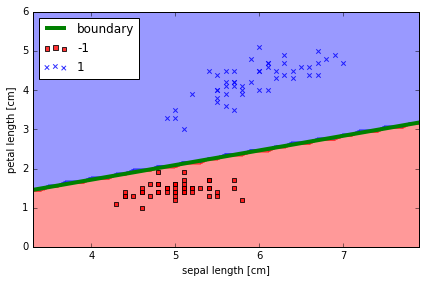

In [10]:
low_res = 0.1 # intentional for this exercise
plot_decision_regions(X, y, classifier=ppn, resolution=low_res)
plot_decision_boundary(X, y, classifier=ppn)

plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')

plt.tight_layout()
# plt.savefig('./perceptron_2.png', dpi=300)
plt.show()

# PART TWO : Stochastic Gradient Descent

### Code Segment 1: AdalineSGD code

In [57]:
from numpy.random import seed

class AdalineSGD(object):
    """ADAptive LInear NEuron classifier.

    Parameters
    ------------
    eta : float
        Learning rate (between 0.0 and 1.0)
    n_iter : int
        Passes over the training dataset.

    Attributes
    -----------
    w_ : 1d-array
        Weights after fitting.
    errors_ : list
        Number of misclassifications in every epoch.
    shuffle : bool (default: True)
        Shuffles training data every epoch if True to prevent cycles.
    random_state : int (default: None)
        Set random state for shuffling and initializing the weights.
        
    """
    def __init__(self, eta=0.01, n_iter=10, shuffle=True, random_state=None):
        self.eta = eta
        self.n_iter = n_iter
        self.w_initialized = False
        self.shuffle = shuffle
        
        self.cost_minibatch = []
        self.cost_ = [] 
        if not self.w_initialized:
            self._initialize_weights(X.shape[1])
            
        if random_state:
            seed(random_state)
    
    def fit(self, X, y):
        """ Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_samples, n_features]
            Training vectors, where n_samples is the number of samples and
            n_features is the number of features.
        y : array-like, shape = [n_samples]
            Target values.

        Returns
        -------
        self : object

        """
        self._initialize_weights(X.shape[1])
        self.cost_ = []
        for i in range(self.n_iter):
            if self.shuffle:
                X, y = self._shuffle(X, y)
            cost = []
            for xi, target in zip(X, y):
                cost.append(self._update_weights(xi, target))
            avg_cost = sum(cost) / len(y)
            self.cost_.append(avg_cost)
        return self
    
    
    def partial_fit(self, X, y):
        """Fit training data without reinitializing the weights"""
        self.cost_minibatch.append(self._update_weights(X,y))
        return self
        
    def _shuffle(self, X, y):
        """Shuffle training data"""
        r = np.random.permutation(len(y))
        return X[r], y[r]
    
    def _initialize_weights(self, m):
        """Initialize weights to zeros"""
        self.w_ = np.zeros(1 + m)
        self.w_initialized = True
        
    def _update_weights(self, xi, target):
        """Apply Adaline learning rule to update the weights"""
        output = self.net_input(xi)
        error = (target - output)
        self.w_[1:] += self.eta * np.dot(xi.transpose(), error)
        self.w_[0] += self.eta * error.sum()
        cost = (error **2).sum() / len(error)
        return cost
    
    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def activation(self, X):
        """Compute linear activation"""
        return self.net_input(X)

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.activation(X) >= 0.0, 1, -1)

## Q2 (50pts): Experiment with different batch sizes

Modify the code above so that we can visualize the costs with different batch sizes. Note that each batch size should have a separate plot for average cost (y axis) versus number of trained samples (x axis). What you find out from your experiments?

## <font color='orange'>My Answer and Explanations </font>

### <font color='orange'>Fndings in the experiments </font>
As the mini-batch size increases, we need to scan through more training samples to have the model converging. i.e. when we use a really small number as our mini-batch size, the cost function will be minimized faster versus number of samples used. It is because that, when the mini-batch size is large, we need large amount of training data in order to make only one step towards the objective. 

Hence, when we have to deal with cases with large amount of data (e.g. 300,000,000), we need to consider using a small mini-batch size in order to make the computation less expensive

### <font color='orange'>Additional Notes</font>

###### <font color='orange'>Cost function:</font> 

In Algorithm perspective cost function for Stochastic Gradient Descent and Mini-batch Gradient Descent is actually calculated different. Here, in order to properly compare the cost changing behaviors for different mini-batch size, we use the following equation to calculate the cost. Suppose Mini-Batch Size = b, then:
\begin{align}
cost &= \frac{1}{b} \sum_i \left(t^{(i)}-y^{(i)}\right)^2
\end{align}
###### <font color='orange'>Shuffling:</font> 

It is true that random shuflling before each iteration will make our analysis more reasonable. But in order to focus on the trends and for simplicity, I didn't include it. To do that, we can just add ada.shuffle(X_std,y) at the beginning of each iteration

###### <font color='orange'>Code explaination</font>
1. weight updates: end of each mini-batch
2. cost for each mini-batch: recorded at end of each mini-batch
3. overal cost for a iteration: calculated as the average of all mini-batch costs in this iteration, recorded for plotting. The code modification is in Code Segment 3 below


###### <font color='orange'>Code change summary</font>
1. function AdalineSGD._init_() to initialize property to mark cost and mini-batch costs
2. function AdalineSGD.partial_fit() and AdalineSGD._update_weights()
3. Code Segment 3 to calculate cost at end of each iteration (end of batch)

### Code Segment 2: Standardize Features

In [58]:
X_std = np.copy(X)
X_std[:, 0] = (X[:, 0] - X[:, 0].mean()) / X[:, 0].std()
X_std[:, 1] = (X[:, 1] - X[:, 1].mean()) / X[:, 1].std()

### Code Segment 3: Training and Plotting

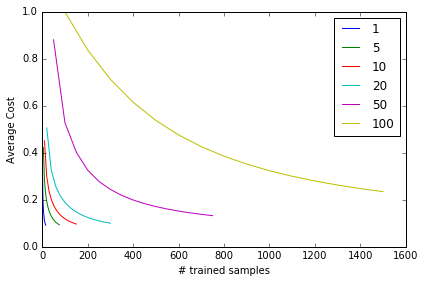

In [59]:
iterations = 15
batch_sizes = [1, 5, 10, 20, 50, 100]

for batch_size in batch_sizes:
    ada = AdalineSGD(n_iter=0, eta=0.01, random_state=1)
    for iteration in range(iterations):
        num_batches = np.ceil(y.ravel().shape[0]/batch_size).astype(int)
        for batch_index in range(num_batches):
            start_index = batch_index*batch_size
            end_index = start_index + batch_size
            ada.partial_fit(X_std[start_index:end_index, :], y[start_index:end_index])
        avg_cost = sum(ada.cost_minibatch)/len(ada.cost_minibatch)
        ada.cost_.append(avg_cost)
    plt.plot([batch_size * x for x in range(1, len(ada.cost_) + 1)], ada.cost_, label=str(batch_size))

if len(batch_sizes) > 0: 
    plt.xlabel('# trained samples')
    plt.ylabel('Average Cost')
    plt.legend(loc='best')

    plt.tight_layout()
    # plt.savefig('./adaline_5.png', dpi=300)
    plt.show()